# ***🛡️ Project: Guarding Transactions with AI-Powered Credit Card Fraud Detection and Prevention***

## **🔰 1. Introduction**
**Goal**: Develop a fraud detection system using AI (LightGBM) to identify fraudulent credit card transactions with high accuracy and low false positives.

## **📦 2. Import Dependencies**

In [2]:
# Data Handling
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing and Evaluation
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# LightGBM
import lightgbm as lgb

# Warnings
import warnings
warnings.filterwarnings('ignore')


## **📂 3. Load the Dataset**

In [3]:
df = pd.read_csv('CreditCardData.csv')

In [4]:
df.head()

,Transaction ID,Date,Day of Week,Time,Type of Card,Entry Mode,Amount,Type of Transaction,Merchant Group,Country of Transaction,Shipping Address,Country of Residence,Gender,Age,Bank,Fraud
0,#3577 209,14-Oct-20,Wednesday,19,Visa,Tap,£5,POS,Entertainment,United Kingdom,United Kingdom,United Kingdom,M,25.2,RBS,0
1,#3039 221,14-Oct-20,Wednesday,17,MasterCard,PIN,£288,POS,Services,USA,USA,USA,F,49.6,Lloyds,0
2,#2694 780,14-Oct-20,Wednesday,14,Visa,Tap,£5,POS,Restaurant,India,India,India,F,42.2,Barclays,0
3,#2640 960,13-Oct-20,Tuesday,14,Visa,Tap,£28,POS,Entertainment,United Kingdom,India,United Kingdom,F,51.0,Barclays,0
4,#2771 031,13-Oct-20,Tuesday,23,Visa,CVC,£91,Online,Electronics,USA,USA,United Kingdom,M,38.0,Halifax,1


In [ ]:
print("Shape of dataset:", df.shape)

Shape of dataset: (100000, 16)


## **🧠 4. Understand the Dataset**

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 16 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Transaction ID          100000 non-null  object 
 1   Date                    100000 non-null  object 
 2   Day of Week             100000 non-null  object 
 3   Time                    100000 non-null  int64  
 4   Type of Card            100000 non-null  object 
 5   Entry Mode              100000 non-null  object 
 6   Amount                  99994 non-null   object 
 7   Type of Transaction     100000 non-null  object 
 8   Merchant Group          99990 non-null   object 
 9   Country of Transaction  100000 non-null  object 
 10  Shipping Address        99995 non-null   object 
 11  Country of Residence    100000 non-null  object 
 12  Gender                  99996 non-null   object 
 13  Age                     100000 non-null  float64
 14  Bank                 

In [7]:
# Statistical Summary
df.describe(include='all')

,Transaction ID,Date,Day of Week,Time,Type of Card,Entry Mode,Amount,Type of Transaction,Merchant Group,Country of Transaction,Shipping Address,Country of Residence,Gender,Age,Bank,Fraud
count,100000,100000,100000,100000.000000,100000,100000,99994,100000,99990,100000,99995,100000,99996,100000.000000,100000,100000.000000
unique,95680,4,4,NaN,2,3,396,3,10,5,5,5,2,NaN,8,NaN
top,#2547 017,14-Oct-20,Wednesday,NaN,Visa,PIN,£17,Online,Children,United Kingdom,United Kingdom,United Kingdom,M,NaN,Barclays,NaN
freq,5,50184,50177,NaN,53812,49976,2153,33481,10679,71199,60905,81859,50875,NaN,29936,NaN
mean,NaN,NaN,NaN,14.562870,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,44.993770,NaN,0.071950
std,NaN,NaN,NaN,5.308195,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.948494,NaN,0.258406
min,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.000000,NaN,0.000000
25%,NaN,NaN,NaN,10.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38.200000,NaN,0.000000
50%,NaN,NaN,NaN,15.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,44.900000,NaN,0.000000
75%,NaN,NaN,NaN,19.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,51.700000,NaN,0.000000


In [8]:
# Check Missing Values
print(df.isnull().sum())

Transaction ID             0
Date                       0
Day of Week                0
Time                       0
Type of Card               0
Entry Mode                 0
Amount                     6
Type of Transaction        0
Merchant Group            10
Country of Transaction     0
Shipping Address           5
Country of Residence       0
Gender                     4
Age                        0
Bank                       0
Fraud                      0
dtype: int64


## **⚖️ 5. Check Class Imbalance**

Fraud
0    92805
1     7195
Name: count, dtype: int64


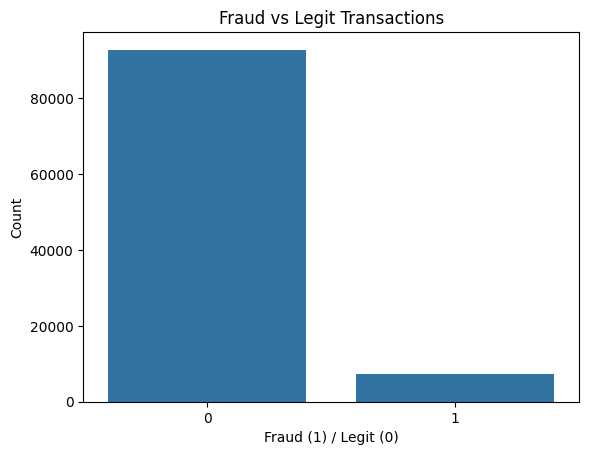

In [ ]:
# Value Counts
print(df['Fraud'].value_counts())

# Visualize Class Distribution
sns.countplot(x='Fraud', data=df)
plt.title("Fraud vs Legit Transactions")
plt.xlabel("Fraud (1) / Legit (0)")
plt.ylabel("Count")
plt.show()

## **🛠️ 6. Preprocessing and Encoding**

**Step 1**: Clean the 'Amount' Column
Remove the currency symbol and convert it to a numeric format.

In [ ]:
# Clean 'Amount' column by removing currency symbol and converting to numeric
df['Amount'] = df['Amount'].replace({'£': ''}, regex=True)  # Remove currency symbol
df['Amount'] = pd.to_numeric(df['Amount'], errors='coerce')  # Convert to numeric, 'coerce' sets errors as NaN

**Step 2**: Fill Missing Values
+ For numerical columns, fill missing values with the median.

+ For categorical columns, fill missing values with the mode.

In [ ]:
# Fill missing values in 'Amount' with the median
df['Amount'] = df['Amount'].fillna(df['Amount'].median())

# Fill missing values for categorical columns
df['Merchant Group'] = df['Merchant Group'].fillna(df['Merchant Group'].mode()[0])
df['Gender'] = df['Gender'].fillna(df['Gender'].mode()[0])
df['Country of Transaction'] = df['Country of Transaction'].fillna(df['Country of Transaction'].mode()[0])
df['Country of Residence'] = df['Country of Residence'].fillna(df['Country of Residence'].mode()[0])

**Step 3**: Label Encoding for Categorical Columns
+ Convert text-based columns into numeric values using LabelEncoder.

In [ ]:
# Label Encoding for categorical features
df['Day of Week'] = df['Day of Week'].astype('category').cat.codes
df['Type of Card'] = df['Type of Card'].astype('category').cat.codes
df['Entry Mode'] = df['Entry Mode'].astype('category').cat.codes
df['Type of Transaction'] = df['Type of Transaction'].astype('category').cat.codes
df['Merchant Group'] = df['Merchant Group'].astype('category').cat.codes
df['Country of Transaction'] = df['Country of Transaction'].astype('category').cat.codes
df['Country of Residence'] = df['Country of Residence'].astype('category').cat.codes
df['Gender'] = df['Gender'].astype('category').cat.codes
df['Bank'] = df['Bank'].astype('category').cat.codes

**Step 4: Check for Remaining Missing Values**
+ Ensure there are no missing values after cleaning and encoding.

In [ ]:
# Check for any remaining missing values
print(df.isnull().sum())

Transaction ID            0
Date                      0
Day of Week               0
Time                      0
Type of Card              0
Entry Mode                0
Amount                    0
Type of Transaction       0
Merchant Group            0
Country of Transaction    0
Shipping Address          5
Country of Residence      0
Gender                    0
Age                       0
Bank                      0
Fraud                     0
dtype: int64


## **🧑‍💻7. Split the Data into Training and Test Sets**

To train the model effectively, we need to split the data into two parts: one for training the model and one for testing the performance. Typically, we use 70-80% of the data for training and the remaining 20-30% for testing.

We'll also separate the features (independent variables) from the target variable (Fraud).

In [41]:
# Separate features and target variable
X = df.drop(columns=['Fraud'])  # Features
y = df['Fraud']  # Target variable (Fraud)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Verify the split
print(f"Training Data Shape: {X_train.shape}")
print(f"Testing Data Shape: {X_test.shape}")

Training Data Shape: (80000, 15)
Testing Data Shape: (20000, 15)


In [42]:
X_train['Date'] = pd.to_datetime(X_train['Date'])
X_train['Date'] = (X_train['Date'] - pd.Timestamp("1970-01-01")) // pd.Timedelta('1s')

X_test['Date'] = pd.to_datetime(X_test['Date'])
X_test['Date'] = (X_test['Date'] - pd.Timestamp("1970-01-01")) // pd.Timedelta('1s')

In [ ]:
X_train = X_train.drop(columns=['Transaction ID', 'Shipping Address'])
X_test = X_test.drop(columns=['Transaction ID', 'Shipping Address'])

In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoders = {}
for col in X_train.select_dtypes(include='object').columns:
    le = LabelEncoder()
    X_train[col] = le.fit_transform(X_train[col])
    X_test[col] = le.transform(X_test[col])
    label_encoders[col] = le  # For inverse transform if needed later

In [ ]:
assert X_train.shape[1] == X_test.shape[1], "Mismatch in feature count"

In [49]:
assert X_train.isnull().sum().sum() == 0, "Train set has nulls"

In [50]:
assert X_test.isnull().sum().sum() == 0, "Test set has nulls"

## **💡8.Build the LightGBM Model**

LightGBM is an efficient and powerful gradient boosting algorithm. It works well with large datasets and provides fast training times, which makes it a great choice for our fraud detection task.

We will now build and train the LightGBM model.

In [51]:
# Initialize LightGBM classifier
lgbm = lgb.LGBMClassifier(objective='binary', metric='binary_error', random_state=42)

In [52]:
# Train the model on the training data
lgbm.fit(X_train, y_train)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 5740, number of negative: 74260
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004326 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 572
[LightGBM] [Info] Number of data points in the train set: 80000, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.071750 -> initscore=-2.560113
[LightGBM] [Info] Start training from score -2.560113


LGBMClassifier(metric='binary_error', objective='binary', random_state=42)

## **9.✅ Model Evaluation - Performance Metrics and Interpretation**

In [53]:
# Predict on the test data
y_pred = lgbm.predict(X_test)

In [ ]:
# 📊 Generate the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

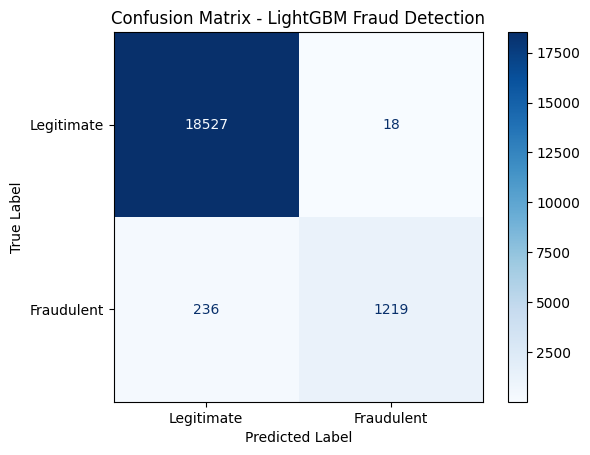

In [55]:
# 📈 Display the Confusion Matrix as a heatmap
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Legitimate", "Fraudulent"])
disp.plot(cmap='Blues', values_format='d')
plt.title("Confusion Matrix - LightGBM Fraud Detection")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.grid(False)
plt.show()

In [56]:
# 🧮 Print the Classification Report for precision, recall, f1-score
print("\n📋 Classification Report:")
print(classification_report(y_test, y_pred, target_names=["Legitimate", "Fraudulent"]))


📋 Classification Report:
              precision    recall  f1-score   support

  Legitimate       0.99      1.00      0.99     18545
  Fraudulent       0.99      0.84      0.91      1455

    accuracy                           0.99     20000
   macro avg       0.99      0.92      0.95     20000
weighted avg       0.99      0.99      0.99     20000



In [57]:
# ✅ Calculate and display the overall accuracy
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print(f"\n🎯 Overall Accuracy: {accuracy:.4f} ({accuracy*100:.2f}%)")


🎯 Overall Accuracy: 0.9873 (98.73%)


## **🚨 10. Real-Time Fraud Detection Simulation using LightGBM**

In [ ]:
import joblib

# Save the trained model using joblib
joblib.dump(lgbm, 'lgbm_fraud_model.pkl')

print("Model saved successfully!")

Model saved successfully!


In [ ]:
# Load the model using joblib
lgbm_loaded = joblib.load('lgbm_fraud_model.pkl')

print("Model loaded successfully!")

Model loaded successfully!


In [ ]:
import pandas as pd
from datetime import datetime

# Example: new transaction data
new_transaction = pd.DataFrame({
    'Date': [int(datetime.now().strftime('%Y%m%d'))],  # Convert current date to YYYYMMDD format
    'Day of Week': [3],  # Example: Wednesday
    'Time': [1500],  # Example: 3 PM
    'Type of Card': [1],  # Example: 1 for 'Credit' card
    'Entry Mode': [1],  # Example: 1 for 'Chip' entry
    'Amount': [120.5],  # Example: $120.5
    'Type of Transaction': [1],  # Example: 1 for 'Purchase'
    'Merchant Group': [2],  # Example: 2 for 'Retail'
    'Country of Transaction': [1],  # Example: 1 for 'USA'
    'Country of Residence': [1],  # Example: 1 for 'USA'
    'Gender': [1],  # Example: 1 for 'Male'
    'Age': [34.0],  # Example: 34 years old
    'Bank': [1]  # Example: 1 for 'Bank A'
})

In [61]:
# Ensure the columns match with training data
print(new_transaction)

# Predict the class (fraudulent or legitimate)
prediction = lgbm_loaded.predict(new_transaction)

       Date  Day of Week  Time  Type of Card  Entry Mode  Amount  \
0  20250501            3  1500             1           1   120.5   

   Type of Transaction  Merchant Group  Country of Transaction  \
0                    1               2                       1   

   Country of Residence  Gender   Age  Bank  
0                     1       1  34.0     1  


In [62]:
# Display result with emojis
if prediction[0] == 0:
    print("Prediction: ✅ Legitimate Transaction")
else:
    print("Prediction: ❌ Fraudulent Transaction")

Prediction: ✅ Legitimate Transaction


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 5731, number of negative: 74250
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006761 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 558
[LightGBM] [Info] Number of data points in the train set: 79981, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.071655 -> initscore=-2.561548
[LightGBM] [Info] Start training from score -2.561548


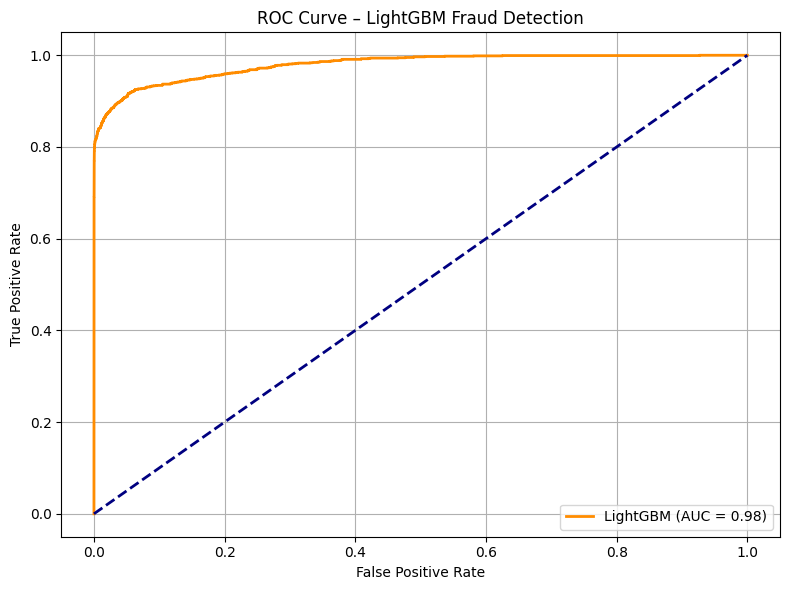

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import lightgbm as lgb

# Step 1: Load and clean the dataset
df = pd.read_csv("CreditCardData.csv")
df = df.dropna()
df['Amount'] = df['Amount'].replace('[£,]', '', regex=True).astype(float)

# Step 2: Select relevant features and target
features = ['Amount', 'Time', 'Type of Card', 'Entry Mode', 'Type of Transaction',
            'Merchant Group', 'Country of Transaction', 'Country of Residence', 'Gender', 'Age']
target = 'Fraud'

# Step 3: Encode categorical features
df_encoded = df[features + [target]].copy()
for col in df_encoded.select_dtypes(include='object').columns:
    df_encoded[col] = LabelEncoder().fit_transform(df_encoded[col])

# Step 4: Split the data
X = df_encoded[features]
y = df_encoded[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Train LightGBM model
model = lgb.LGBMClassifier()
model.fit(X_train, y_train)

# Step 6: Predict probabilities and compute ROC curve
y_proba = model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

# Step 7: Plot the ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'LightGBM (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve – LightGBM Fraud Detection')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 5731, number of negative: 74250
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003599 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 558
[LightGBM] [Info] Number of data points in the train set: 79981, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.071655 -> initscore=-2.561548
[LightGBM] [Info] Start training from score -2.561548


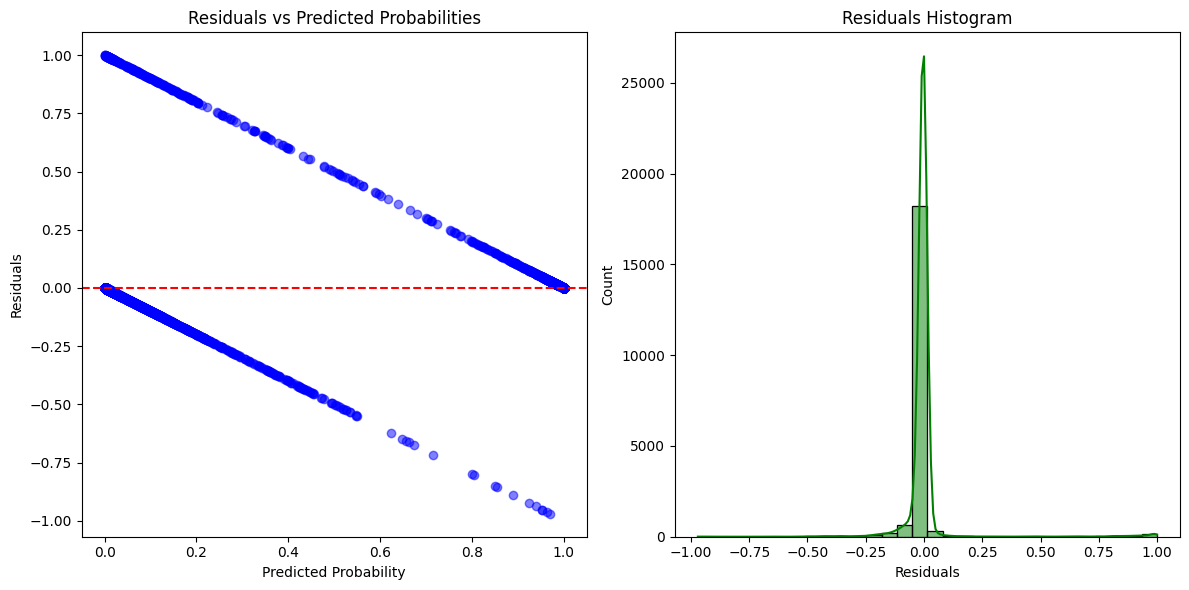

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns
import lightgbm as lgb

# Step 1: Load and clean the dataset
df = pd.read_csv("CreditCardData.csv")
df = df.dropna()
df['Amount'] = df['Amount'].replace('[£,]', '', regex=True).astype(float)

# Step 2: Select relevant features and target
features = ['Amount', 'Time', 'Type of Card', 'Entry Mode', 'Type of Transaction',
            'Merchant Group', 'Country of Transaction', 'Country of Residence', 'Gender', 'Age']
target = 'Fraud'

# Step 3: Encode categorical features
df_encoded = df[features + [target]].copy()
for col in df_encoded.select_dtypes(include='object').columns:
    df_encoded[col] = LabelEncoder().fit_transform(df_encoded[col])

# Step 4: Split the data
X = df_encoded[features]
y = df_encoded[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Train LightGBM model
model = lgb.LGBMClassifier()
model.fit(X_train, y_train)

# Step 6: Predict probabilities
y_proba = model.predict_proba(X_test)[:, 1]

# Step 7: Calculate residuals
# For binary classification, residuals can be calculated as (True value - Predicted probability)
residuals = y_test - y_proba

# Step 8: Plot residuals
plt.figure(figsize=(12, 6))

# Residual plot against predicted probabilities
plt.subplot(1, 2, 1)
plt.scatter(y_proba, residuals, color='blue', alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Residuals vs Predicted Probabilities')
plt.xlabel('Predicted Probability')
plt.ylabel('Residuals')

# Histogram of residuals
plt.subplot(1, 2, 2)
sns.histplot(residuals, kde=True, color='green', bins=30)
plt.title('Residuals Histogram')
plt.xlabel('Residuals')

# Display the plots
plt.tight_layout()
plt.show()